In [12]:
from random import randint
from matplotlib import pyplot
from math import log, ceil, pi
import png
from IPython.display import Image

In [13]:
matrixes = []
matrixes.append([[-0.231, -0.092],
                 [0.196, 0.800]])
matrixes.append([[0.857, -0.196],
                 [0.348, -0.144]])
matrixes.append([[-0.231, -0.020],
                 [-0.276, 0.768]])

vectors = []
vectors.append((35.723, -68.830))
vectors.append((11.678, 35.113))
vectors.append((-47.715, 45.252))

In [14]:
def apply_random_map(current_x : float, current_y : float) -> tuple[float, float]:
    index = randint(0, len(matrixes) - 1)
    matrix = matrixes[index]
    vector = vectors[index]

    result_x = current_x * matrix[0][0] + current_y * matrix[0][1] + vector[0]
    result_y = current_x * matrix[1][0] + current_y * matrix[1][1] + vector[1]

    return (result_x, result_y)

In [15]:
def create_attractor(start_x : float, start_y : float, iterations_count : int):
    result = []
    current_x, current_y = start_x, start_y
    result.append((current_x, current_y))
    for _ in range(iterations_count - 1):
        current_x, current_y = apply_random_map(current_x, current_y)
        result.append((current_x, current_y))
    return result

In [16]:
def generate_image(x : list[float], y : list[float], image_dimension : int):
    min_x = min(x)
    min_y = min(y)
    dim_x = max(x) - min_x
    dim_y = max(y) - min_y
    x_step = dim_x / (image_dimension - 1)
    y_step = dim_y / (image_dimension - 1)
    
    x = list(map(lambda i : int((i - min_x) / x_step), x))
    y = list(map(lambda i : int((i - min_y) / y_step), y))

    data = set(zip(x, y))

    pixels = [[True for _ in range(image_dimension)] for _ in range(image_dimension)]
    for (x_index, y_index) in data:
        pixels[image_dimension - y_index - 1][x_index] = False
    filename = f"attractors/{len(x)}_{image_dimension}x{image_dimension}.png"
    png.from_array(pixels, 'L;1').save(filename)
    display(Image(filename=filename))

    return len(data)

In [17]:
def show_results(start_x : float, start_y : float, points_count : int, image_dimension : int = 512):
    data = create_attractor(start_x, start_y, points_count)
    x, y = zip(*data)
    pyplot.scatter(x, y, s=0.5)
    pyplot.show()
    pixels_count = generate_image(x, y, image_dimension)
    print("Fractal Dimension: ", log(pixels_count) / log(image_dimension))


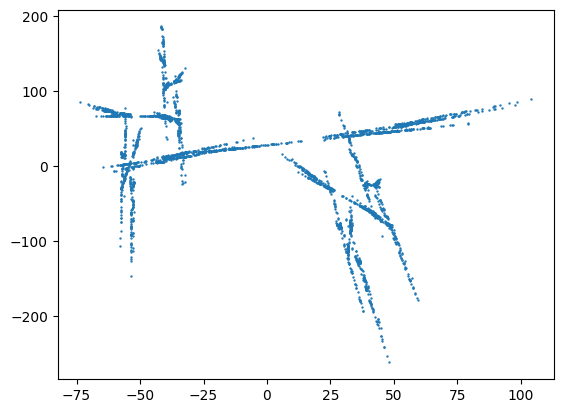

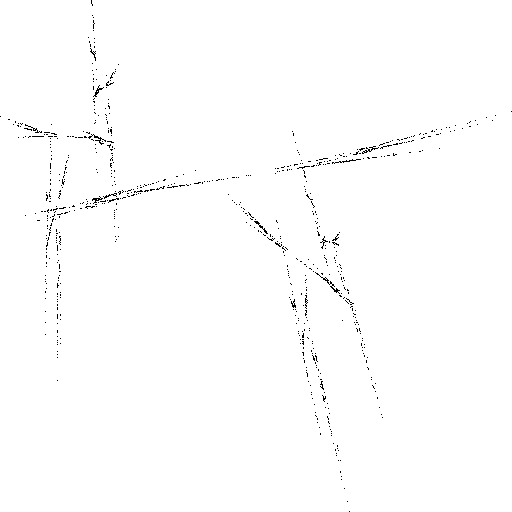

Fractal Dimension:  1.212460095143969


In [18]:
show_results(10, 10, 3_000)

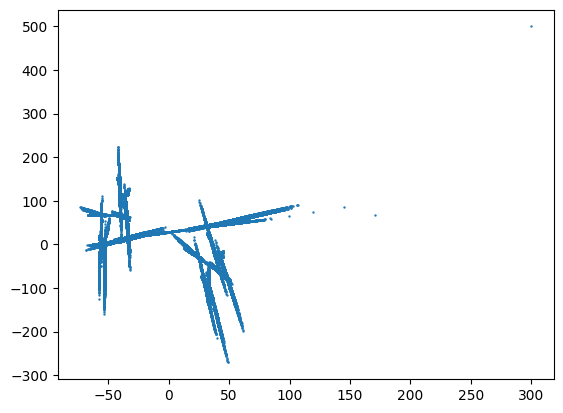

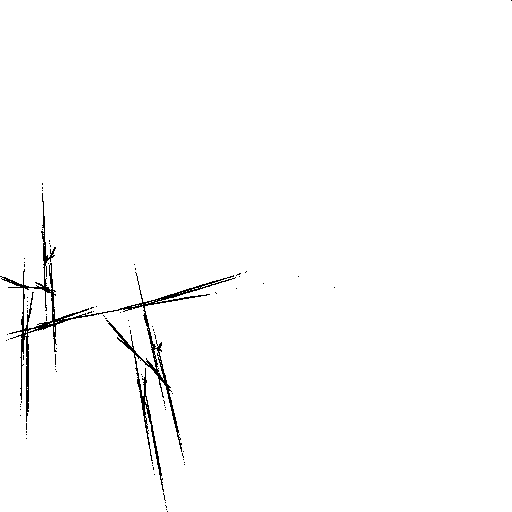

Fractal Dimension:  1.3034798923361182


In [19]:
show_results(300, 500, 10_0000)

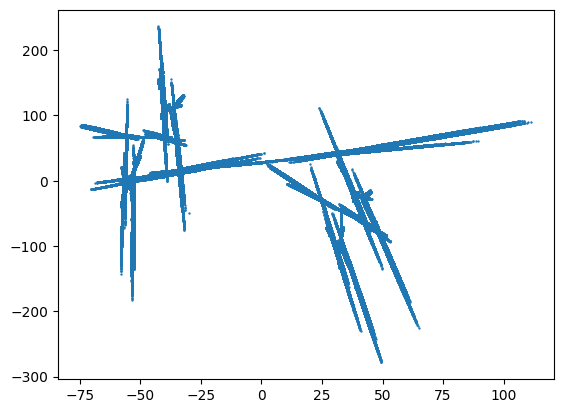

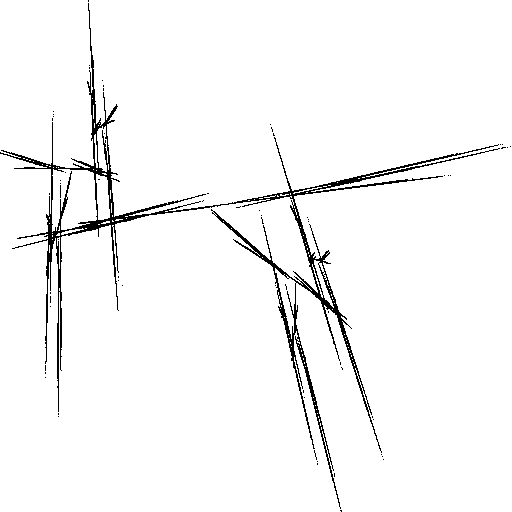

Fractal Dimension:  1.4500398718430667


In [20]:
show_results(-30, -50, 300_0000)

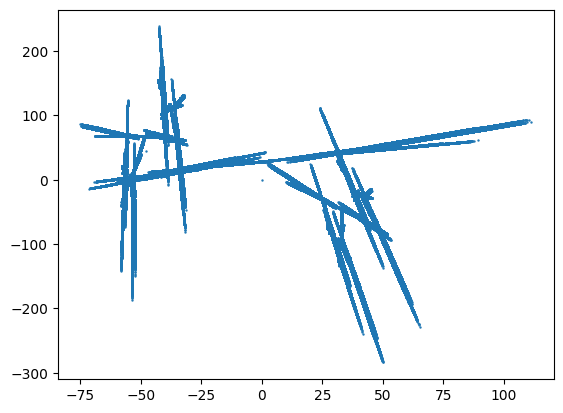

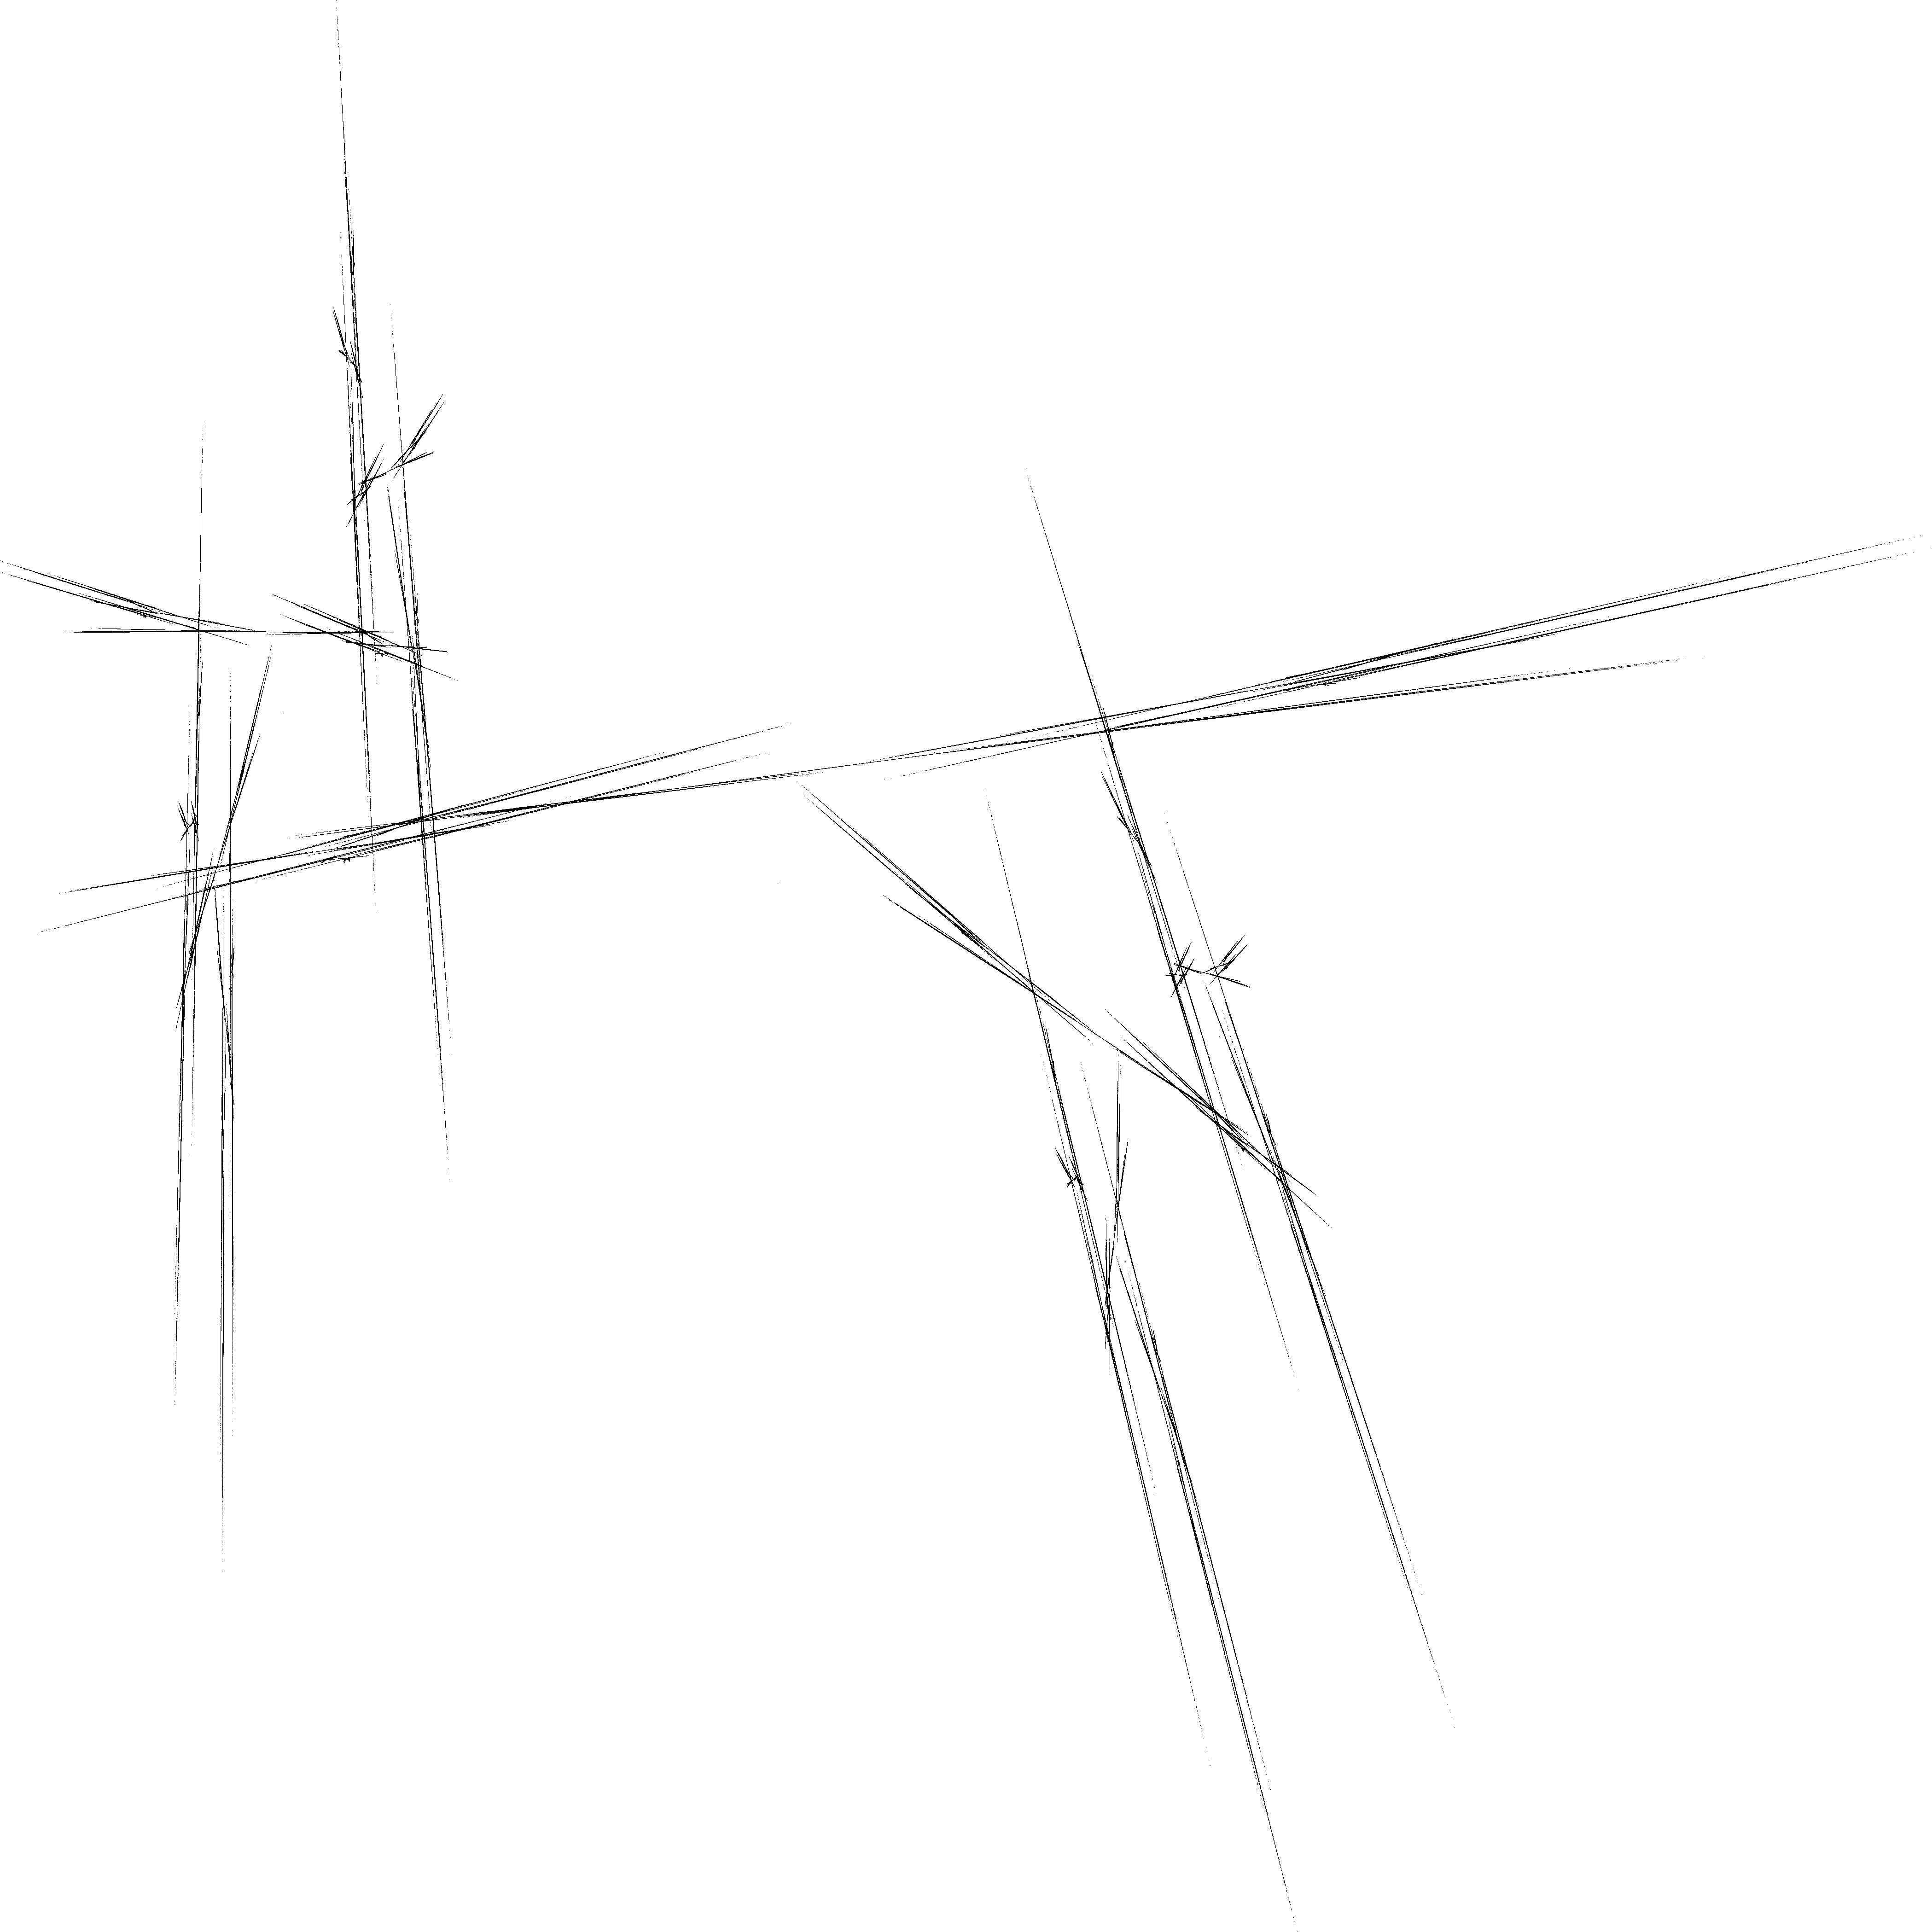

Fractal Dimension:  1.419026811442502


In [23]:
show_results(0, 0, 10_000_000, 4196)